<a id="1"></a> <br>
# **Time Series Forecasting **

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post.
**I am going to  predict TMA with time series forecasting using LSTM method**

 Time Series Forecasting using LSTM


# **Import library **

*   Numpy
*   Pandas
*   Keras
*   Pandas
*   SkLearn
*   Matplotlib
*   Datetime

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import timedelta

# **Import Dataset **

Dataset yang digunakan adalah Tinggi Muka Air (TMA) dengan pintu sungai :
*   Depok
*   Manggarai
*   Katulampa



##### Read Dataset dengan Pandas

In [ ]:
data = pd.read_excel('TMA_FIX.xlsx')
data.head(5)

,Date,Depok,Manggarai,Katulampa
0,2022-10-01 00:00:00,80.0,600.0,10.0
1,2022-10-01 01:00:00,80.0,600.0,10.0
2,2022-10-01 02:00:00,80.0,600.0,10.0
3,2022-10-01 03:00:00,80.0,600.0,10.0
4,2022-10-01 04:00:00,80.0,600.0,10.0


In [ ]:
import pandas as pd

# Mengonversi kolom Datetime ke tipe data datetime
data['Date'] = pd.to_datetime(data['Date'])

# Memisahkan kolom tanggal dan jam
data['Tanggal'] = data['Date'].dt.date
data['Waktu'] = data['Date'].dt.time
data

,Date,Depok,Manggarai,Katulampa,Tanggal,Waktu
0,2022-10-01 00:00:00,80.0,600.0,10.0,2022-10-01,00:00:00
1,2022-10-01 01:00:00,80.0,600.0,10.0,2022-10-01,01:00:00
2,2022-10-01 02:00:00,80.0,600.0,10.0,2022-10-01,02:00:00
3,2022-10-01 03:00:00,80.0,600.0,10.0,2022-10-01,03:00:00
4,2022-10-01 04:00:00,80.0,600.0,10.0,2022-10-01,04:00:00
...,...,...,...,...,...,...
8786,2023-10-02 02:00:00,105.0,560.0,10.0,2023-10-02,02:00:00
8787,2023-10-02 03:00:00,95.0,560.0,10.0,2023-10-02,03:00:00
8788,2023-10-02 04:00:00,90.0,560.0,10.0,2023-10-02,04:00:00
8789,2023-10-02 05:00:00,85.0,560.0,10.0,2023-10-02,05:00:00


In [ ]:
df = data[['Waktu',"Tanggal", 'Depok', 'Manggarai', 'Katulampa']]
df.to_csv("dataTMA2.csv", index=False)

##### Cek Column dari dataset TMA

In [ ]:
data.columns

Index(['Date', 'Depok', 'Manggarai', 'Katulampa', 'Tanggal', 'Waktu'], dtype='object')

##### Ubah Waktu tanggal menjadi bentuk Datetime

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace= True)

###### Menyimpan setiap column TMA pintu kedalam variable

In [ ]:
data1 = data[['Depok' ]]
data2 = data[['Manggarai' ]]
data3 = data[['Katulampa' ]]

In [ ]:
data1.info()
data2.info()
data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8791 entries, 2022-10-01 00:00:00 to 2023-10-02 06:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depok   8791 non-null   float64
dtypes: float64(1)
memory usage: 137.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8791 entries, 2022-10-01 00:00:00 to 2023-10-02 06:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Manggarai  8791 non-null   float64
dtypes: float64(1)
memory usage: 137.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8791 entries, 2022-10-01 00:00:00 to 2023-10-02 06:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Katulampa  8791 non-null   float64
dtypes: float64(1)
memory usage: 137.4 KB


In [ ]:
data1

,Depok
Date,
2022-10-01 00:00:00,80.0
2022-10-01 01:00:00,80.0
2022-10-01 02:00:00,80.0
2022-10-01 03:00:00,80.0
2022-10-01 04:00:00,80.0
...,...
2023-10-02 02:00:00,105.0
2023-10-02 03:00:00,95.0
2023-10-02 04:00:00,90.0


###### Copy dataset TMA kedalam variable df

In [ ]:
df = data.copy()
df

,Depok,Manggarai,Katulampa,Tanggal,Waktu
Date,,,,,
2022-10-01 00:00:00,80.0,600.0,10.0,2022-10-01,00:00:00
2022-10-01 01:00:00,80.0,600.0,10.0,2022-10-01,01:00:00
2022-10-01 02:00:00,80.0,600.0,10.0,2022-10-01,02:00:00
2022-10-01 03:00:00,80.0,600.0,10.0,2022-10-01,03:00:00
2022-10-01 04:00:00,80.0,600.0,10.0,2022-10-01,04:00:00
...,...,...,...,...,...
2023-10-02 02:00:00,105.0,560.0,10.0,2023-10-02,02:00:00
2023-10-02 03:00:00,95.0,560.0,10.0,2023-10-02,03:00:00
2023-10-02 04:00:00,90.0,560.0,10.0,2023-10-02,04:00:00


In [ ]:
# Menyimpan dataframe ke file Excel
df.to_excel('Data_Tinggi_Muka_Air.xlsx', index=False)

###### Visualisasi Grafik TMA dari setiap pintu

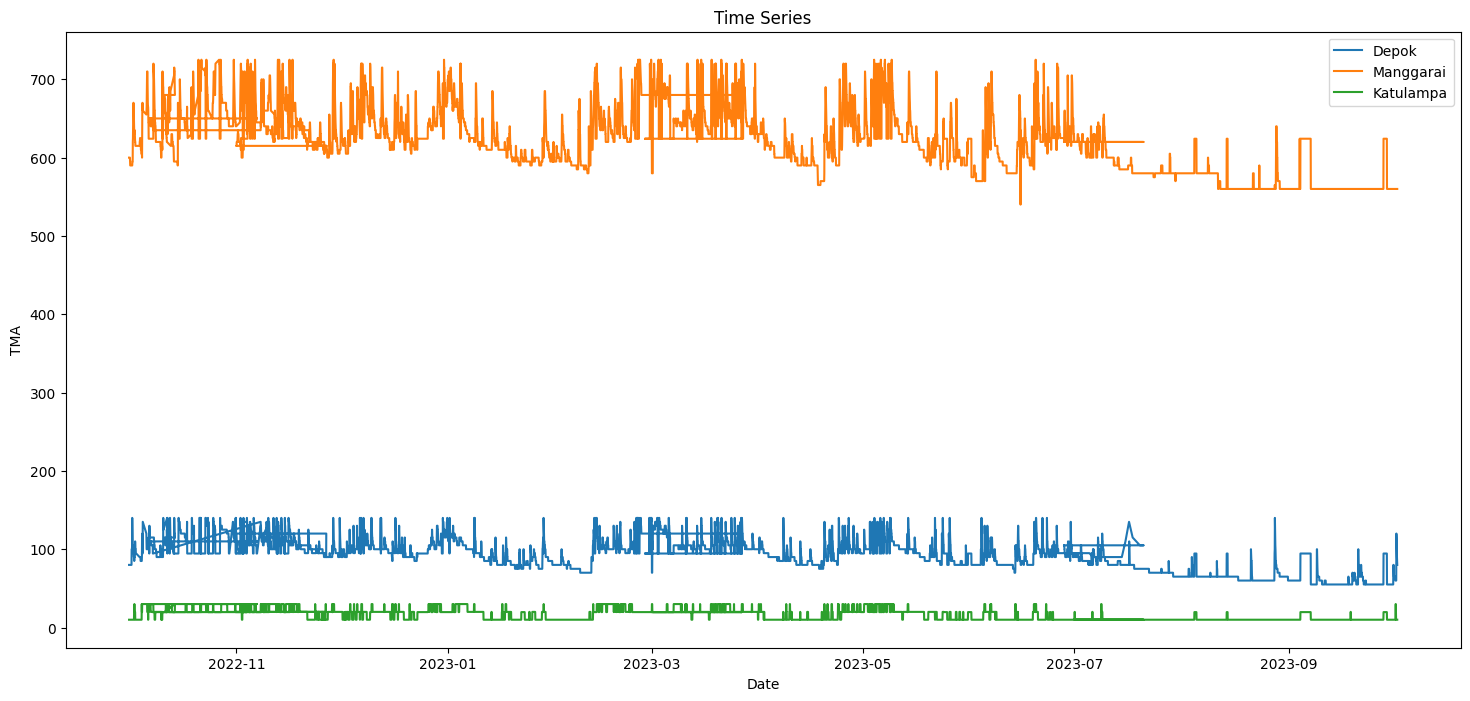

In [ ]:
# Mengatur ukuran gambar
plt.figure(figsize=(18, 8))

# Plotting data1 dengan label 'Depok'
plt.plot(data1, label='Depok')

# Plotting data2 dengan label 'Manggarai'
plt.plot(data2, label='Manggarai')

# Plotting data3 dengan label 'Katulampa'
plt.plot(data3, label='Katulampa')

# Memberikan judul, label sumbu x dan y
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('TMA')

# Menampilkan legenda untuk membedakan warna garis plot
plt.legend()

# Menampilkan grafik
plt.show()


<a id="1"></a> <br>
# Time Series Forecast using LSTM

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.


###### Convert dataset TM kedalam bentuk array dengan tipe data Float32
###### Menyimpan setiap column kedalam variable terpisah

In [ ]:
# Mengonversi dataframe ke array numpy dan tipe data float32
data = data.values.astype('float32')

# Memisahkan kolom data menjadi tiga array terpisah
data1 = data[:, [0]]  # Kolom 'Depok'
data2 = data[:, [1]]  # Kolom 'Manggarai'
data3 = data[:, [2]]  # Kolom 'Katulampa'

TypeError: ignored

In [ ]:
data3

,Katulampa
Date,
2022-10-01 00:00:00,10.0
2022-10-01 01:00:00,10.0
2022-10-01 02:00:00,10.0
2022-10-01 03:00:00,10.0
2022-10-01 04:00:00,10.0
...,...
2023-10-02 02:00:00,10.0
2023-10-02 03:00:00,10.0
2023-10-02 04:00:00,10.0


##### Scaling data yang sebelumnya sudah dipisah kedalam rentang -1 sampai 1

In [ ]:
scaler1= MinMaxScaler(feature_range=(-1,1))
scaler2= MinMaxScaler(feature_range=(-1,1))
scaler3= MinMaxScaler(feature_range=(-1,1))
sc1 = scaler1.fit_transform(data1)
sc2 = scaler2.fit_transform(data2)
sc3 = scaler3.fit_transform(data3)

In [ ]:
sc1

array([[-0.41176471],
       [-0.41176471],
       [-0.41176471],
       ...,
       [-0.17647059],
       [-0.29411765],
       [-0.41176471]])

# **Train Test **

Pembagian dataset menjadi 2 bagian yaitu data latih dan data uji. Data latih akan digunakan untuk membangun model. Sementara data uji akan digunakan untuk evaluasi dan pengukuran performa model pada data baru (yang belum pernah dilihat model selama pelatihan).

In [ ]:
timestep = 24

# Fungsi untuk membuat input dan output
def create_sequences(data, timestep):
    X = []
    Y = []
    for i in range(len(data) - timestep):
        X.append(data[i:i + timestep])
        Y.append(data[i + timestep])
    return np.asarray(X), np.asarray(Y)

# Membuat input dan output untuk setiap data
X1, Y1 = create_sequences(sc1, timestep)
X2, Y2 = create_sequences(sc2, timestep)
X3, Y3 = create_sequences(sc3, timestep)

# Menentukan jumlah data training dan testing yang diinginkan
jumlah_data_train = 8016
jumlah_data_test = 775

# Memisahkan data training
Xtrain1, Ytrain1 = X1[:jumlah_data_train], Y1[:jumlah_data_train]
Xtrain2, Ytrain2 = X2[:jumlah_data_train], Y2[:jumlah_data_train]
Xtrain3, Ytrain3 = X3[:jumlah_data_train], Y3[:jumlah_data_train]

# Memisahkan data testing
Xtest1, Ytest1 = X1[-jumlah_data_test:], Y1[-jumlah_data_test:]
Xtest2, Ytest2 = X2[-jumlah_data_test:], Y2[-jumlah_data_test:]
Xtest3, Ytest3 = X3[-jumlah_data_test:], Y3[-jumlah_data_test:]

##### Menampilkan hasil pembagian dataset train dan test

In [ ]:
# Menampilkan ukuran masing-masing dataset
# Hasil untuk sc1
print("Hasil untuk sc1:")
print("Xtrain shape:", Xtrain1.shape)
print("Ytrain shape:", Ytrain1.shape)
print("Xtest shape:", Xtest1.shape)
print("Ytest shape:", Ytest1.shape)

# Hasil untuk sc2
print("\nHasil untuk sc2:")
print("Xtrain shape:", Xtrain2.shape)
print("Ytrain shape:", Ytrain2.shape)
print("Xtest shape:", Xtest2.shape)
print("Ytest shape:", Ytest2.shape)

# Hasil untuk sc3
print("\nHasil untuk sc3:")
print("Xtrain shape:", Xtrain3.shape)
print("Ytrain shape:", Ytrain3.shape)
print("Xtest shape:", Xtest3.shape)
print("Ytest shape:", Ytest3.shape)


Hasil untuk sc1:
Xtrain shape: (8016, 24, 1)
Ytrain shape: (8016, 1)
Xtest shape: (775, 24, 1)
Ytest shape: (775, 1)

Hasil untuk sc2:
Xtrain shape: (8016, 24, 1)
Ytrain shape: (8016, 1)
Xtest shape: (775, 24, 1)
Ytest shape: (775, 1)

Hasil untuk sc3:
Xtrain shape: (8016, 24, 1)
Ytrain shape: (8016, 1)
Xtest shape: (775, 24, 1)
Ytest shape: (775, 1)


# **LSTM Model **

Membuat LSTM model 1,2,3

In [ ]:
model1 = Sequential()

model1.add(LSTM(64,activation = 'relu', input_shape= (24,1), return_sequences=True))
model1.add(LSTM(64, activation='relu', return_sequences=True))
model1.add(LSTM(64, activation='sigmoid', return_sequences=False))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

In [ ]:
model2 = Sequential()

model2.add(LSTM(64,activation = 'relu', input_shape= (24,1), return_sequences=True))
model2.add(LSTM(64, activation='relu', return_sequences=True))
model2.add(LSTM(64, activation='sigmoid', return_sequences=False))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

In [ ]:
model3 = Sequential()

model3.add(LSTM(64,activation = 'relu', input_shape= (24,1), return_sequences=True))
model3.add(LSTM(64, activation='relu', return_sequences=True))
model3.add(LSTM(64, activation='sigmoid', return_sequences=False))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 24, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 32)            4352      
                                                                 
 lstm_4 (LSTM)               (None, 24, 32)            8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Pelatihan model dari setiap data dengan menggunakan epoch sebesar 100

In [ ]:
history_depok = model1.fit(X1,Y1,epochs=150, verbose=1)
history_manggarai = model2.fit(X2,Y2,epochs=150, verbose=1)
history_katulampa = model3.fit(X3,Y3,epochs=150, verbose=1)

Epoch 1/150
274/274 [==============================] - 24s 48ms/step - loss: 0.0702
Epoch 2/150
274/274 [==============================] - 8s 30ms/step - loss: 0.0297
Epoch 3/150
274/274 [==============================] - 10s 37ms/step - loss: 0.0262
Epoch 4/150
274/274 [==============================] - 9s 34ms/step - loss: 0.0246
Epoch 5/150
274/274 [==============================] - 9s 32ms/step - loss: 0.0242
Epoch 6/150
274/274 [==============================] - 10s 36ms/step - loss: 0.0242
Epoch 7/150
274/274 [==============================] - 9s 31ms/step - loss: 0.0239
Epoch 8/150
274/274 [==============================] - 10s 35ms/step - loss: 0.0238
Epoch 9/150
274/274 [==============================] - 10s 38ms/step - loss: 0.0240
Epoch 10/150
274/274 [==============================] - 8s 30ms/step - loss: 0.0238
Epoch 11/150
274/274 [==============================] - 11s 40ms/step - loss: 0.0231
Epoch 12/150
274/274 [==============================] - 10s 37ms/step - loss: 0

##### Visualisasi Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

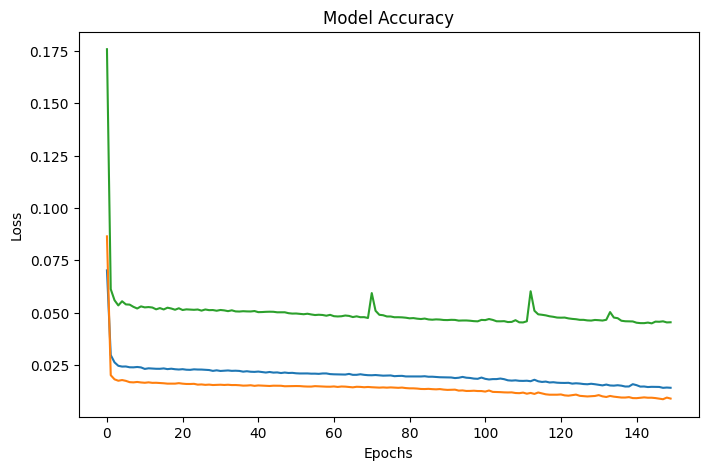

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_depok.history['loss'], label = 'Depok')
plt.plot(history_manggarai.history['loss'], label = 'Manggarai')
plt.plot(history_katulampa.history['loss'], label = 'Katulampa')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [ ]:
Ytest2

array([[-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0.7837839 ],
       [-0

##### Prediksi data test dari model yang sudah dibuat sebelumnya

In [ ]:
# Prediksi untuk sc1
preds1 = model1.predict(Xtest1)
preds1 = scaler1.inverse_transform(preds1)

# Ground truth untuk sc1
Ytest1 = Ytest1.reshape(-1, 1)
Ytest_true1 = scaler1.inverse_transform(Ytest1)

# Prediksi untuk sc2
preds2 = model2.predict(Xtest2)
preds2 = scaler2.inverse_transform(preds2)

# Ground truth untuk sc2
Ytest2 = Ytest2.reshape(-1, 1)
Ytest_true2 = scaler2.inverse_transform(Ytest2)

# Prediksi untuk sc3
preds3 = model3.predict(Xtest3)
preds3 = scaler3.inverse_transform(preds3)

# Ground truth untuk sc3
Ytest3 = Ytest3.reshape(-1, 1)
Ytest_true3 = scaler3.inverse_transform(Ytest3)

# Menghitung mean squared error untuk setiap data
mse1 = mean_squared_error(Ytest_true1, preds1)
mse2 = mean_squared_error(Ytest_true2, preds2)
mse3 = mean_squared_error(Ytest_true3, preds3)

25/25 [==============================] - 1s 8ms/step


In [ ]:
# Menampilkan hasil
print("Mean Squared Error for sc1:", mse1)
print("Mean Squared Error for sc2:", mse2)
print("Mean Squared Error for sc3:", mse3)

Mean Squared Error for sc1: 20.056921
Mean Squared Error for sc2: 26.80264
Mean Squared Error for sc3: 1.1409395


##### Visualisasi hasil prediksi tinggi muka air (TMA) di lokasi 'Depok', 'Manggarai', dan 'Katulampa'

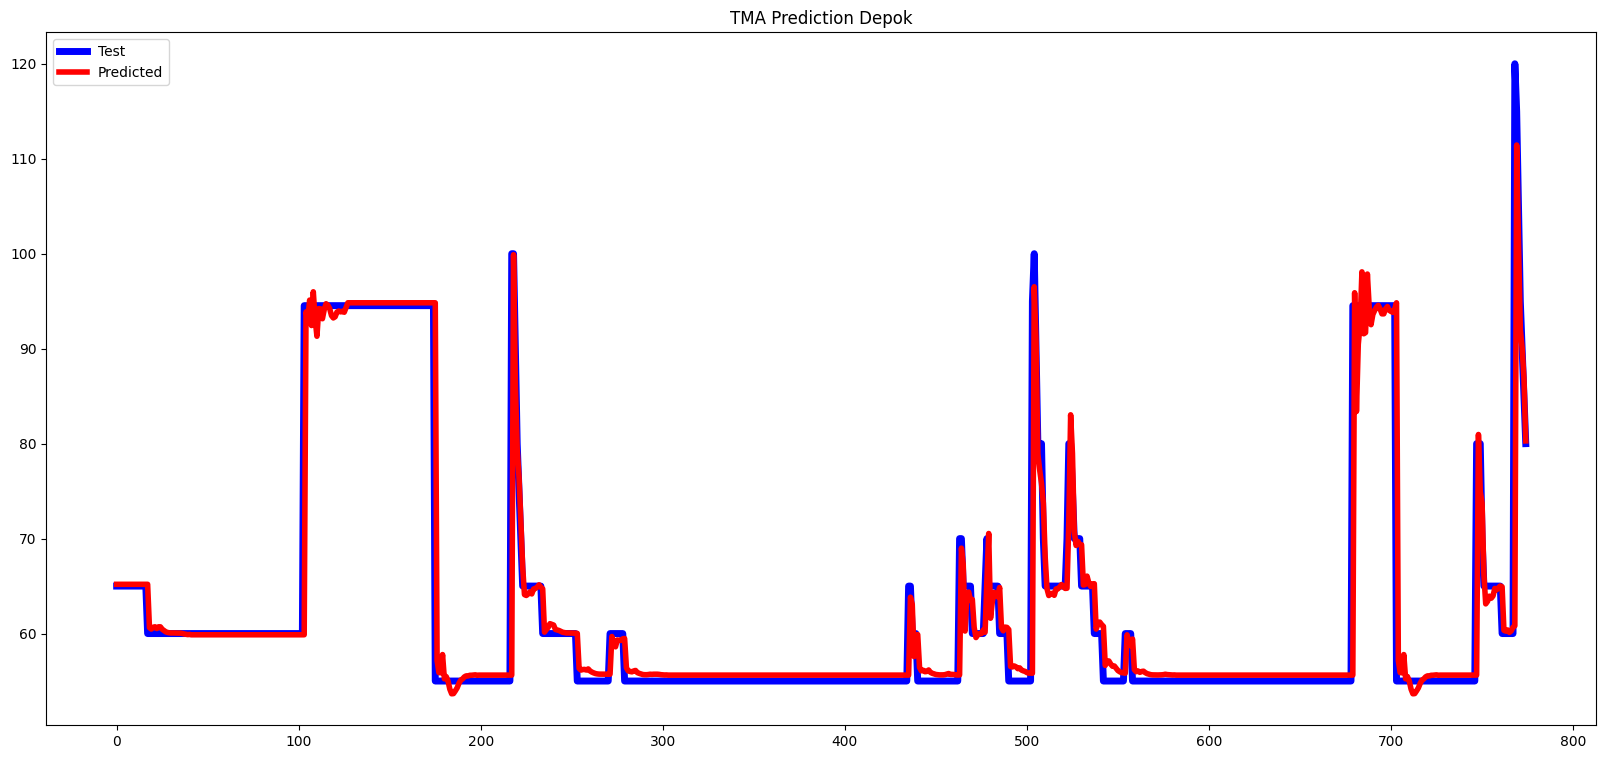

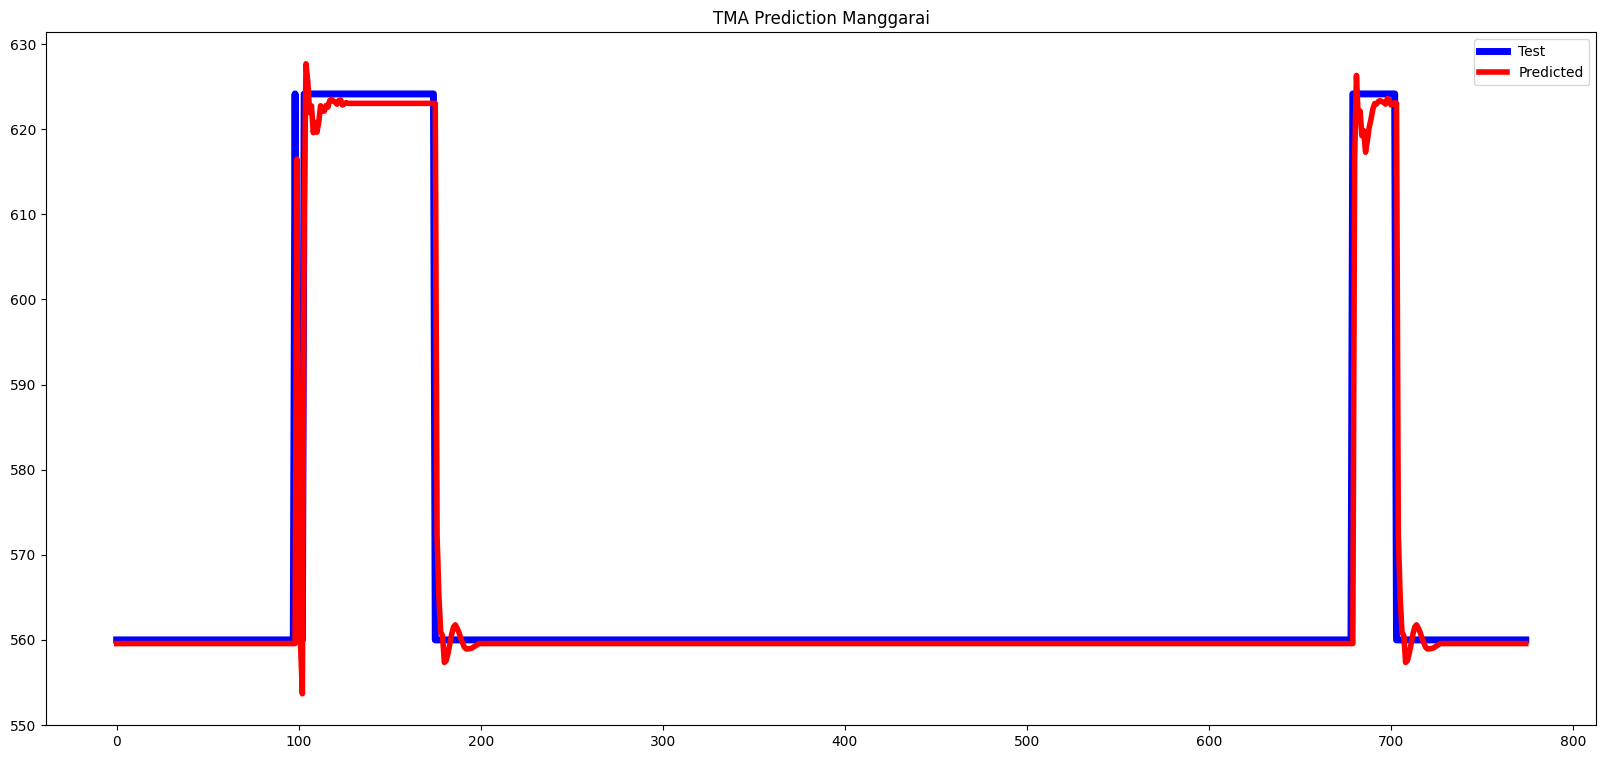

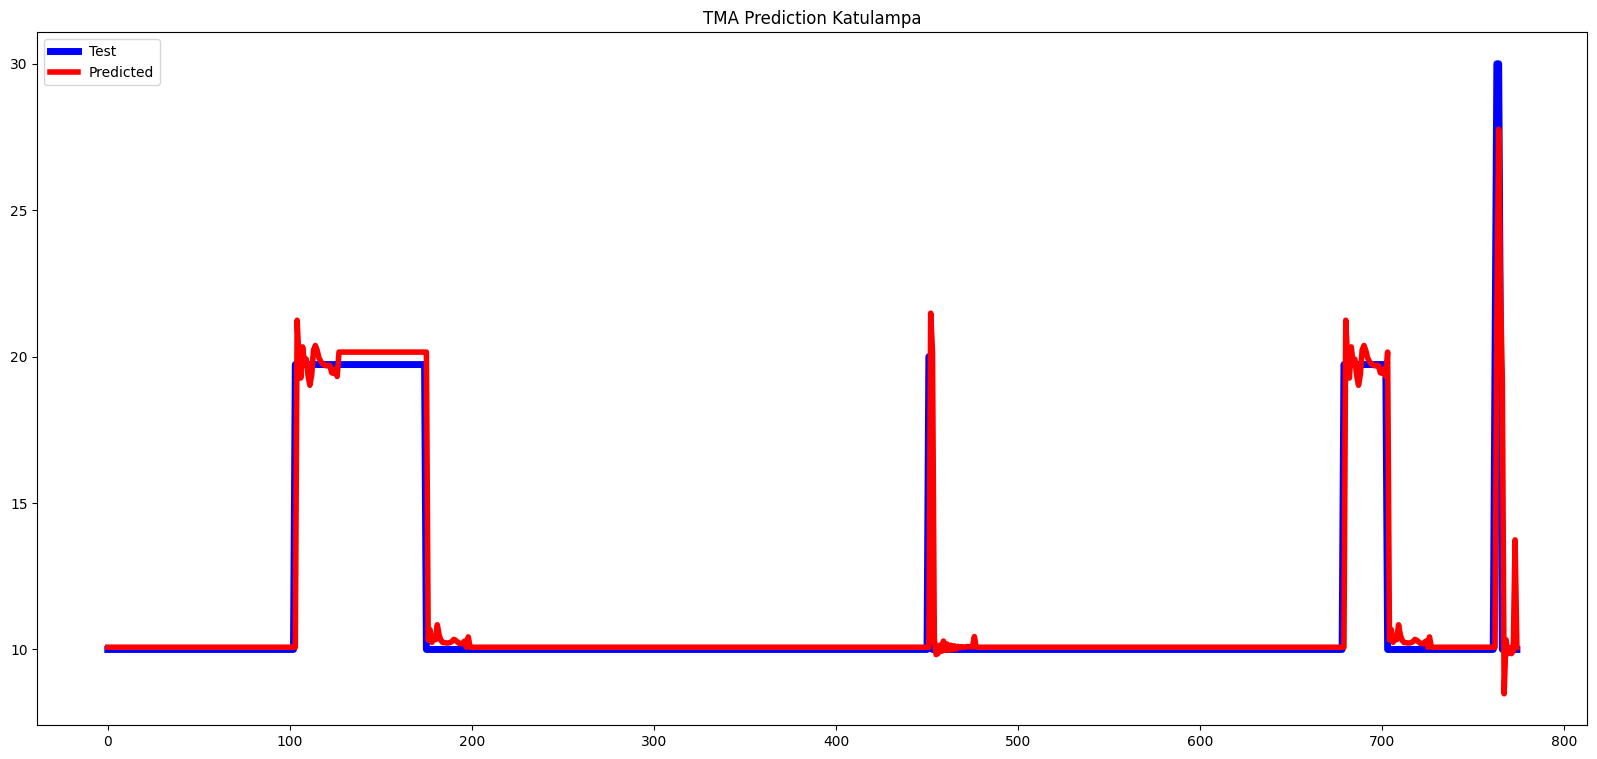

In [ ]:
# Plot untuk sc1
plt.figure(figsize=(20, 9))
plt.plot(Ytest_true1, 'blue', linewidth=5)
plt.plot(preds1, 'r', linewidth=4)
plt.legend(('Test', 'Predicted'))
plt.title("TMA Prediction Depok")
plt.show()

# Plot untuk sc2
plt.figure(figsize=(20, 9))
plt.plot(Ytest_true2, 'blue', linewidth=5)
plt.plot(preds2, 'r', linewidth=4)
plt.legend(('Test', 'Predicted'))
plt.title("TMA Prediction Manggarai")
plt.show()

# Plot untuk sc3
plt.figure(figsize=(20, 9))
plt.plot(Ytest_true3, 'blue', linewidth=5)
plt.plot(preds3, 'r', linewidth=4)
plt.legend(('Test', 'Predicted'))
plt.title("TMA Prediction Katulampa")
plt.show()


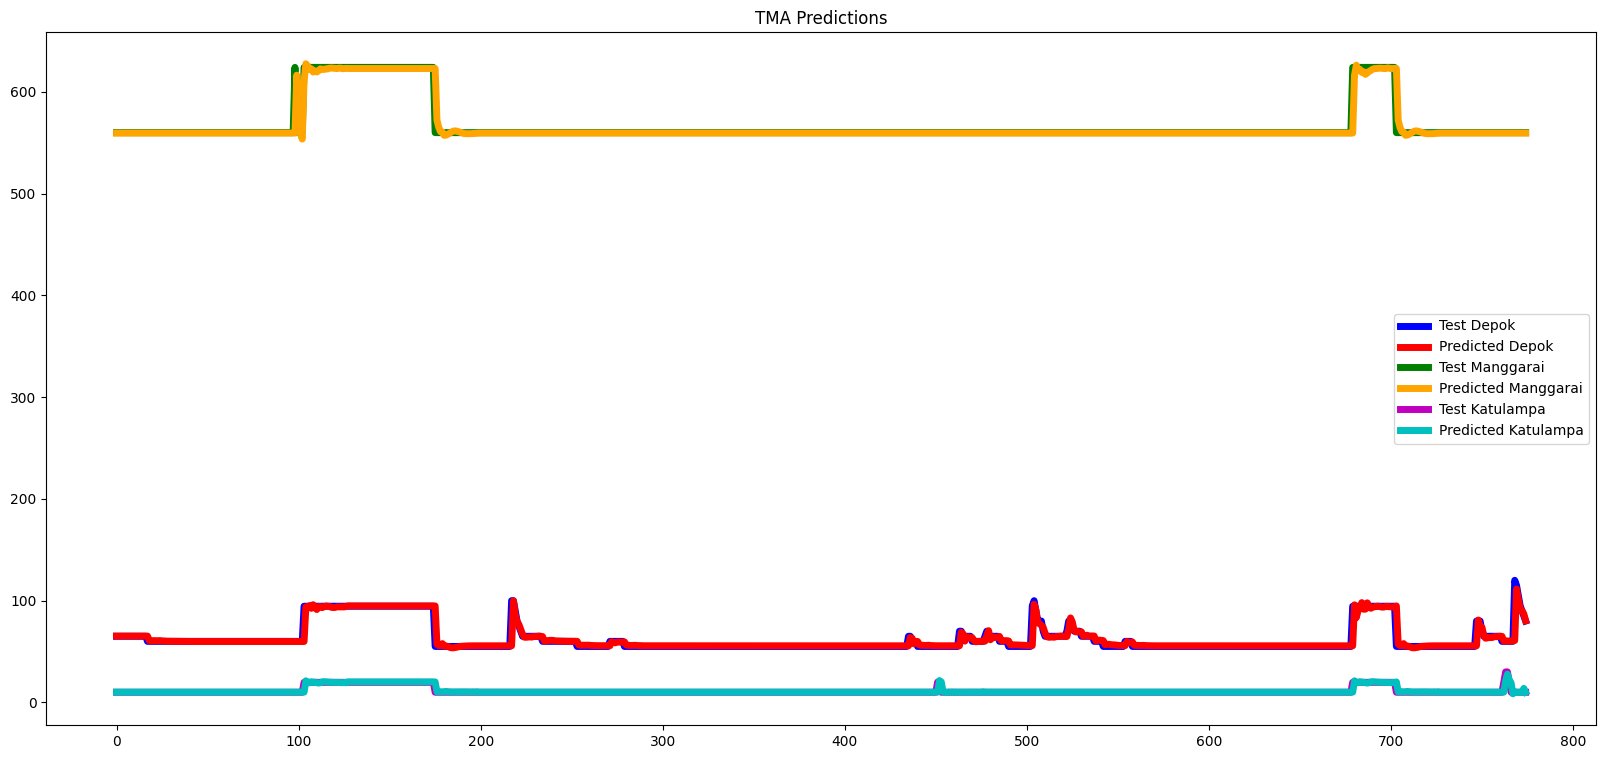

In [ ]:
# Plot gabungan untuk ketiga skenario
plt.figure(figsize=(20, 9))

# Plot untuk sc1
plt.plot(Ytest_true1, 'blue', linewidth=5)
plt.plot(preds1, 'r', linewidth=5)

# Plot untuk sc2
plt.plot(Ytest_true2, 'green', linewidth=5)
plt.plot(preds2, 'orange', linewidth=5)

# Plot untuk sc3
plt.plot(Ytest_true3, 'm', linewidth=5)
plt.plot(preds3, 'c', linewidth=5)

# Menambahkan legenda
plt.legend(('Test Depok', 'Predicted Depok', 'Test Manggarai', 'Predicted Manggarai', 'Test Katulampa', 'Predicted Katulampa'))

# Menambahkan judul
plt.title("TMA Predictions")

# Menampilkan grafik
plt.show()


##### Hasil prediksi tinggi muka air (TMA) dalam bentuk Dataframe

In [ ]:
# Membuat DataFrames untuk sc1
test1 = pd.DataFrame(Ytest_true1, columns=['Actual_sc1'])
pred1 = pd.DataFrame(preds1, columns=['Predicted_sc1'])
results1 = pd.concat([test1,pred1],axis=1)

# Membuat DataFrames untuk sc2
test2 = pd.DataFrame(Ytest_true2, columns=['Actual_sc2'])
pred2 = pd.DataFrame(preds2, columns=['Predicted_sc2'])
results2= pd.concat([test2,pred2],axis=1)

# Membuat DataFrames untuk sc3
test3 = pd.DataFrame(Ytest_true3, columns=['Actual_sc3'])
pred3 = pd.DataFrame(preds3, columns=['Predicted_sc3'])
results3 = pd.concat([test3,pred3],axis=1)

# Menampilkan DataFrames
print("DataFrames for sc1:")
print(results1.head())

print("\nDataFrames for sc2:")
print(results2.head())

print("\nDataFrames for sc3:")
print(results3.head())

DataFrames for sc1:
   Actual_sc1  Predicted_sc1
0        65.0      65.185776
1        65.0      65.185776
2        65.0      65.185776
3        65.0      65.185776
4        65.0      65.185776

DataFrames for sc2:
   Actual_sc2  Predicted_sc2
0       560.0     559.567749
1       560.0     559.567749
2       560.0     559.567749
3       560.0     559.567749
4       560.0     559.567749

DataFrames for sc3:
   Actual_sc3  Predicted_sc3
0        10.0      10.076289
1        10.0      10.076289
2        10.0      10.076289
3        10.0      10.076289
4        10.0      10.076289


In [ ]:
results1.to_csv('Predict_test_Depok.csv', index=False)
results2.to_csv('Predict_test_Manggarai.csv', index=False)
results3.to_csv('Predict_test_Katulampa.csv', index=False)

##### Membuat Fungsi untuk menambahkan tanggal baru

In [ ]:
def insert_end(Xin,new_input):
    print ('Before: \n', Xin , new_input )
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    print ('After :\n', Xin)
    return Xin

In [ ]:
df

,Depok,Manggarai,Katulampa
Date,,,
2022-10-01 00:00:00,80.0,600.0,10.0
2022-10-01 01:00:00,80.0,600.0,10.0
2022-10-01 02:00:00,80.0,600.0,10.0
2022-10-01 03:00:00,80.0,600.0,10.0
2022-10-01 04:00:00,80.0,600.0,10.0
...,...,...,...
2023-10-02 02:00:00,105.0,560.0,10.0
2023-10-02 03:00:00,95.0,560.0,10.0
2023-10-02 04:00:00,90.0,560.0,10.0


##### Prediksi waktu kedepannya dengan menentukan future_hours sebesar 24 jam kedepan

In [ ]:
# this section for unknown future
# we are getting next 24 steps
future_hours = 24
forecast1 = []
forecast2 = []
forecast3 = []
time1 = []
time2 = []
time3 = []

X_in1 = Xtest1[-1:, :, :]
X_in2 = Xtest2[-1:, :, :]
X_in3 = Xtest3[-1:, :, :]

for i in range(future_hours):
    # Prediksi untuk sc1
    out1 = model1.predict(X_in1, batch_size=1)
    forecast1.append(out1[0, 0])
    X_in1 = insert_end(X_in1, out1[0, 0])

    # Prediksi untuk sc2
    out2 = model2.predict(X_in2, batch_size=1)
    forecast2.append(out2[0, 0])
    X_in2 = insert_end(X_in2, out2[0, 0])

    # Prediksi untuk sc3
    out3 = model3.predict(X_in3, batch_size=1)
    forecast3.append(out3[0, 0])
    X_in3 = insert_end(X_in3, out3[0, 0])

    # Tambahkan waktu ke dalam list waktu
    time1.append(pd.to_datetime(df.index[-1]) + timedelta(hours=i + 1))
    time2.append(pd.to_datetime(df.index[-1]) + timedelta(hours=i + 1))
    time3.append(pd.to_datetime(df.index[-1]) + timedelta(hours=i + 1))

# Menampilkan hasil prediksi
print("Forecast for sc1:", forecast1)
print("Forecast for sc2:", forecast2)
print("Forecast for sc3:", forecast3)
print("Time for sc1:", time1)
print("Time for sc2:", time2)
print("Time for sc3:", time3)


Streaming output truncated to the last 5000 lines.
  [-0.8035982 ]
  [-0.80395335]
  [-0.8043096 ]
  [-0.8046181 ]
  [-0.80485   ]
  [-0.805007  ]
  [-0.80509824]
  [-0.80513287]
  [-0.8051255 ]
  [-0.80509126]
  [-0.8050446 ]
  [-0.80499744]
  [-0.80496055]
  [-0.8049403 ]
  [-0.8049395 ]
  [-0.8049556 ]
  [-0.8049841 ]
  [-0.8050197 ]
  [-0.8050581 ]
  [-0.8050951 ]
  [-0.80512697]
  [-0.80515134]]] -0.80516696
After :
 [[[-0.80328804]
  [-0.8035982 ]
  [-0.80395335]
  [-0.8043096 ]
  [-0.8046181 ]
  [-0.80485   ]
  [-0.805007  ]
  [-0.80509824]
  [-0.80513287]
  [-0.8051255 ]
  [-0.80509126]
  [-0.8050446 ]
  [-0.80499744]
  [-0.80496055]
  [-0.8049403 ]
  [-0.8049395 ]
  [-0.8049556 ]
  [-0.8049841 ]
  [-0.8050197 ]
  [-0.8050581 ]
  [-0.8050951 ]
  [-0.80512697]
  [-0.80515134]
  [-0.80516696]]]
1/1 [==============================] - 0s 43ms/step
Before: 
 [[[-0.9542475 ]
  [-0.9898109 ]
  [-0.99432576]
  [-0.9916829 ]
  [-0.9930299 ]
  [-0.9902242 ]
  [-0.9928278 ]
  [-0.9909845 

##### Mengembalikan nilai hasil prediksi dengan inevers transform

In [ ]:
# Invers transform untuk mendapatkan nilai asli untuk ke-3 data
forecasted_output1 = np.asarray(forecast1).reshape(-1, 1)
forecasted_output2 = np.asarray(forecast2).reshape(-1, 1)
forecasted_output3 = np.asarray(forecast3).reshape(-1, 1)

forecasted_output1 = scaler1.inverse_transform(forecasted_output1)
forecasted_output2 = scaler2.inverse_transform(forecasted_output2)
forecasted_output3 = scaler3.inverse_transform(forecasted_output3)

# Menampilkan hasil prediksi yang sudah diinverse transform
print("Forecasted Output for sc1:", forecasted_output1)
print("Forecasted Output for sc2:", forecasted_output2)
print("Forecasted Output for sc3:", forecasted_output3)


Forecasted Output for sc1: [[79.812874]
 [80.12054 ]
 [80.16372 ]
 [80.04403 ]
 [79.985634]
 [80.020424]
 [80.06797 ]
 [80.08138 ]
 [80.104675]
 [80.188614]
 [80.343376]
 [80.5493  ]
 [80.78452 ]
 [81.05407 ]
 [81.38636 ]
 [81.80297 ]
 [82.29452 ]
 [82.819916]
 [83.331535]
 [83.818924]
 [84.27804 ]
 [84.70578 ]
 [85.089096]
 [85.408966]
 [85.65832 ]
 [85.83508 ]
 [85.95191 ]
 [86.02466 ]
 [86.07534 ]
 [86.1217  ]
 [86.17627 ]
 [86.2478  ]
 [86.34539 ]
 [86.475006]
 [86.63622 ]
 [86.82315 ]
 [87.03207 ]
 [87.2537  ]
 [87.47455 ]
 [87.67836 ]
 [87.850464]
 [87.97969 ]
 [88.0587  ]
 [88.08687 ]
 [88.07487 ]
 [88.02507 ]
 [87.93084 ]
 [87.79765 ]]
Forecasted Output for sc2: [[558.0252 ]
 [558.02594]
 [558.02905]
 [558.0334 ]
 [558.0378 ]
 [558.04114]
 [558.043  ]
 [558.04315]
 [558.0416 ]
 [558.039  ]
 [558.0357 ]
 [558.03217]
 [558.0287 ]
 [558.02576]
 [558.0235 ]
 [558.02203]
 [558.0214 ]
 [558.0214 ]
 [558.0219 ]
 [558.0227 ]
 [558.02356]
 [558.0244 ]
 [558.025  ]
 [558.0254 ]
 [558.025

##### Menampilkan hasil prediksi dalam bentuk Dataframe

In [ ]:
# Membuat DataFrame untuk hasil prediksi ke-3 data
date = pd.DataFrame(time1, columns=["Date"])  # Menggunakan time1 karena waktu sama untuk ke-3 data
df_result1 = pd.DataFrame(forecasted_output1, columns=["Forecasted_Depok"])
df_result2 = pd.DataFrame(forecasted_output2, columns=["Forecasted_Manggarai"])
df_result3 = pd.DataFrame(forecasted_output3, columns=["Forecasted_Katulampa"])

# Concatenate DataFrame untuk ke-3 data
df_result = pd.concat([date, df_result1, df_result2, df_result3], axis=1)

df_result

,Date,Forecasted_Depok,Forecasted_Manggarai,Forecasted_Katulampa
0,2023-10-02 07:00:00,79.812874,558.025208,10.088818
1,2023-10-02 08:00:00,80.120537,558.025940,10.078156
2,2023-10-02 09:00:00,80.163719,558.029053,10.084354
3,2023-10-02 10:00:00,80.044029,558.033386,10.083174
4,2023-10-02 11:00:00,79.985634,558.037781,10.082724
5,2023-10-02 12:00:00,80.020424,558.041138,10.087120
6,2023-10-02 13:00:00,80.067970,558.043030,10.083003
7,2023-10-02 14:00:00,80.081383,558.043152,10.086447
8,2023-10-02 15:00:00,80.104675,558.041626,10.085236
9,2023-10-02 16:00:00,80.188614,558.039001,10.087137


##### Menyimpan hasil prediksi dalam bentuk CSV

In [ ]:
df_result.to_csv('Hasil_Predict_24jam_kedepan.csv', index=False)

##### Visualisasi hasil prediksi

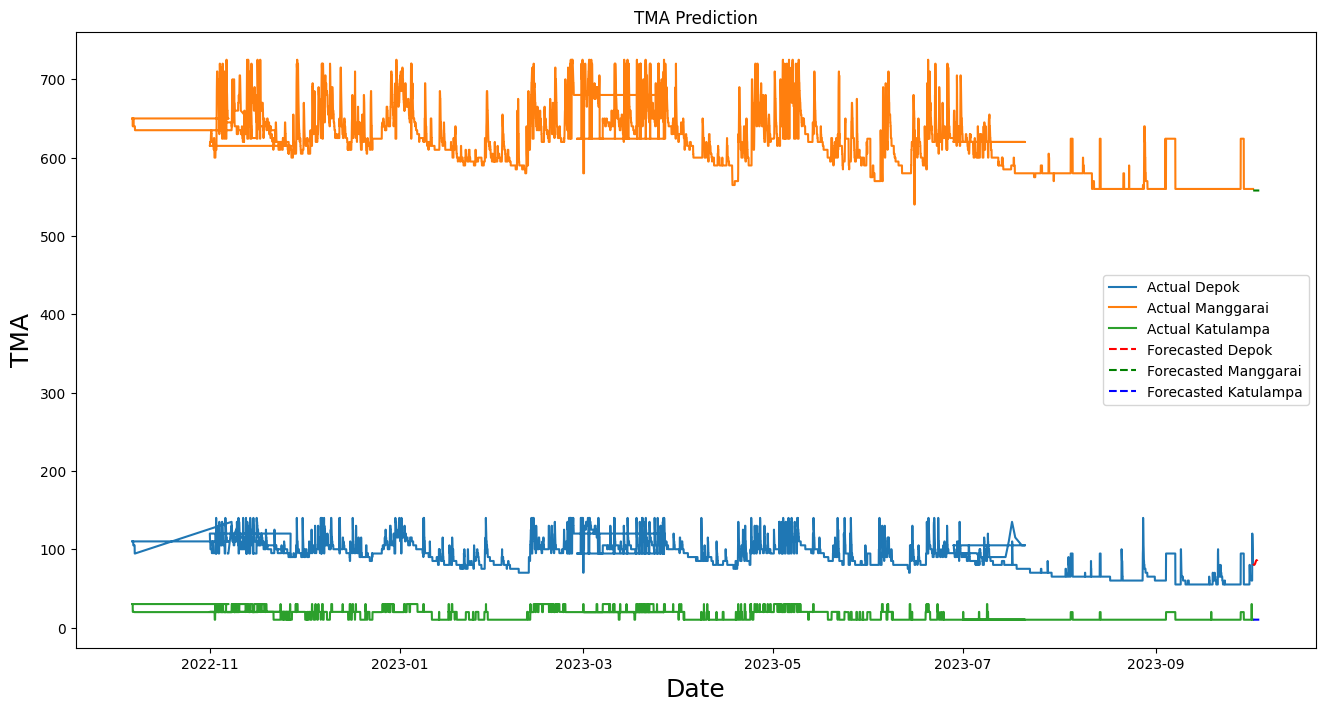

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('TMA Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('TMA', fontsize=18)

# Plot data asli untuk ke-3 data
plt.plot(df['Depok'][500:], label='Actual Depok')
plt.plot(df['Manggarai'][500:], label='Actual Manggarai')
plt.plot(df['Katulampa'][500:], label='Actual Katulampa')

# Plot hasil prediksi untuk ke-3 data
plt.plot(df_result.set_index('Date')['Forecasted_Depok'], "r--", label='Forecasted Depok')
plt.plot(df_result.set_index('Date')['Forecasted_Manggarai'], "g--", label='Forecasted Manggarai')
plt.plot(df_result.set_index('Date')['Forecasted_Katulampa'], "b--", label='Forecasted Katulampa')

plt.legend()
plt.show()
